In [13]:
import pandas as pd

gen = pd.read_csv("../data/rules/minimal1224_all_uniprot.tsv", sep='\t')
gen.head()

,Name,Reactants,SMARTS,Products,Comments
0,rule0001,Any;Any,[#6:1]-[#8:2].[#8:3]>>[#6:1]-[#8:3].[#8:2],Any;Any,A0A060PLD9;A0A0P0YNP7;A0A0P9RZM9;A1XCQ0;A3E242...
1,rule0002,Any;NAD_CoF,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,NADH_CoF;Any,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
2,rule0003,NADH_CoF;Any,[#6:1]1=[#6:2]-[#7:3]-[#6:4]=[#6:5]-[#6:6]-1.[...,Any;NAD_CoF,A0A023RBJ1;A0A060KZ16;A0A060TBM3;A0A072UJB3;A0...
3,rule0004,Any;NADH_CoF;O2,[#6:1].[#6:2]1=[#6:3]-[#7:4]-[#6:5]=[#6:6]-[#6...,Any;NAD_CoF;WATER,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...
4,rule0005,Any;NAD_CoF;WATER,[#6:1]-[#8:2].[#6:3]1:[#6:4]:[#6:5]:[#6:6]:[#7...,Any;NADH_CoF;O2,A0A1P8W705;A0A250DUW2;A1Z745;A5HMH6;A5HMH7;A5H...


In [14]:
rquery = tuple(sorted(['Any', 'NADH_CoF', 'PYROPHOSPHATE_DONOR_CoF']))
pquery = tuple(sorted(['Any', 'NAD_CoF', 'PPI', 'PYROPHOSPHATE_ACCEPTOR_CoF']))
rtemplates = [tuple(sorted(elt.split(';'))) for elt in gen.loc[:, "Reactants"]]
ptemplates = [tuple(sorted(elt.split(';'))) for elt in gen.loc[:, "Products"]]

all_cofs = set()
for elt in rtemplates + ptemplates:
    for cof in elt:
        all_cofs.add(cof)

for i in range(len(rtemplates)):
    if rquery == rtemplates[i] and pquery == ptemplates[i]:
        print(gen.loc[i])

Name                                                  rule0571
Reactants                 Any;NADH_CoF;PYROPHOSPHATE_DONOR_CoF
SMARTS       [#6:1]-[#8:2].[#6:3]1=[#6:4]-[#7:5]-[#6:6]=[#6...
Products            Any;NAD_CoF;PPI;PYROPHOSPHATE_ACCEPTOR_CoF
Comments     A0A0S2LUS1;B2HN69;M2PFR6;P07702;P40976;Q12572;...
Name: 570, dtype: object


In [15]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
rxn = AllChem.ReactionFromSmarts(gen.loc[570, "SMARTS"], useSmiles=True)

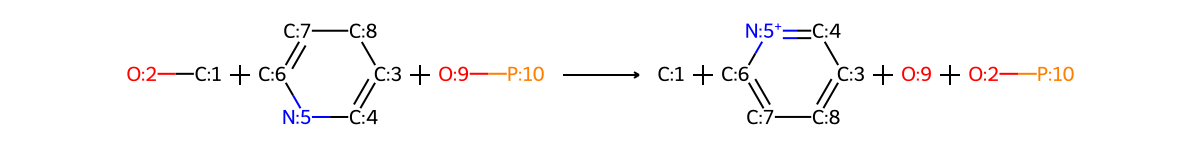

In [16]:
rxn

In [17]:
gen.loc[570, "SMARTS"]

'[#6:1]-[#8:2].[#6:3]1=[#6:4]-[#7:5]-[#6:6]=[#6:7]-[#6:8]-1.[#8:9]-[#15:10]>>[#6:1].[#6:3]1:[#6:8]:[#6:7]:[#6:6]:[#7+:5]:[#6:4]:1.[#8:9].[#8:2]-[#15:10]'

In [18]:
gen.loc[570, "SMARTS"]

substrate = Chem.MolFromSmiles("O=C(O)CCC(=O)C(=O)O")
nadh = Chem.MolFromSmarts("[#6:3]1=[#6:4]-[#7:5]-[#6:6]=[#6:7]-[#6:8]-1")
atp = Chem.MolFromSmarts("[#8:9]-[#15:10]")
products = rxn.RunReactants((substrate, nadh, atp))


In [19]:
IPythonConsole.kekulizeStructures = False

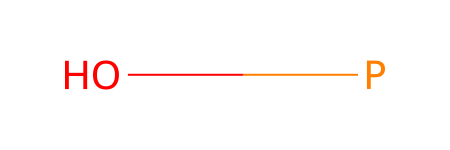

In [8]:
products[0][3]

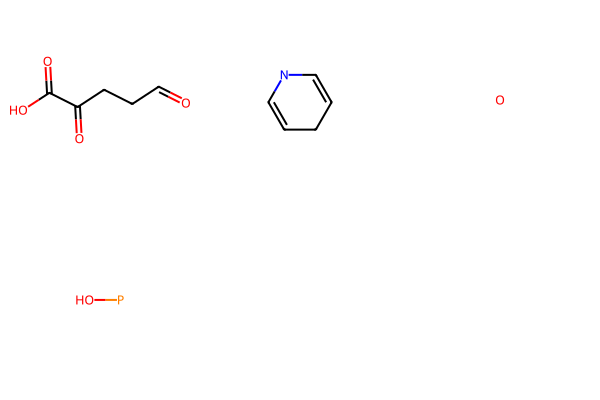

In [9]:
img = Draw.MolsToGridImage(products[0])
img

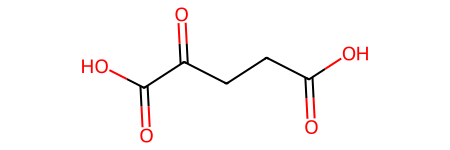

In [10]:
substrate

In [11]:
all_cofs

{'ACETYL-COA',
 'AMINO_CoF',
 'Any',
 'CARBONYL_CoF',
 'CO',
 'CO2',
 'CoA',
 'FADH2_CoF',
 'FAD_CoF',
 'FORMYL_ACCEPTOR_CoF',
 'FORMYL_DONOR_CoF',
 'GLUCOSYL_ACCEPTOR_CoF',
 'GLUCOSYL_DONOR_CoF',
 'H2O2',
 'HCN',
 'HCl',
 'HF',
 'HI',
 'METHYL_ACCEPTOR_CoF',
 'METHYL_DONOR_CoF',
 'NADH_CoF',
 'NAD_CoF',
 'NH3',
 'O2',
 'Oxidized-Factor-F420_CoF',
 'PHOSPHATE_ACCEPTOR_CoF',
 'PHOSPHATE_DONOR_CoF',
 'PPI',
 'PRENYL_ACCEPTOR_CoF',
 'PRENYL_DONOR_CoF',
 'PYROPHOSPHATE_ACCEPTOR_CoF',
 'PYROPHOSPHATE_DONOR_CoF',
 'Pi',
 'Reduced-Factor-F420_CoF',
 'SULFATE',
 'SULFATE_ACCEPTOR_CoF',
 'SULFATE_DONOR_CoF',
 'SULFITE',
 'Ubiquinols_CoF',
 'Ubiquinones_CoF',
 'WATER'}

In [12]:
for i in range(len(rtemplates)):
    print(rtemplates[i], '-->', ptemplates[i])

('Any', 'Any') --> ('Any', 'Any')
('Any', 'NAD_CoF') --> ('Any', 'NADH_CoF')
('Any', 'NADH_CoF') --> ('Any', 'NAD_CoF')
('Any', 'NADH_CoF', 'O2') --> ('Any', 'NAD_CoF', 'WATER')
('Any', 'NAD_CoF', 'WATER') --> ('Any', 'NADH_CoF', 'O2')
('Any', 'Any') --> ('Any', 'WATER')
('Any', 'WATER') --> ('Any', 'Any')
('Any', 'GLUCOSYL_ACCEPTOR_CoF') --> ('Any', 'GLUCOSYL_DONOR_CoF')
('Any', 'GLUCOSYL_DONOR_CoF') --> ('Any', 'GLUCOSYL_ACCEPTOR_CoF')
('Any', 'METHYL_ACCEPTOR_CoF') --> ('Any', 'METHYL_DONOR_CoF')
('Any', 'METHYL_DONOR_CoF') --> ('Any', 'METHYL_ACCEPTOR_CoF')
('Any', 'Any') --> ('Any', 'WATER')
('Any', 'WATER') --> ('Any', 'Any')
('Any', 'PHOSPHATE_ACCEPTOR_CoF') --> ('Any', 'PHOSPHATE_DONOR_CoF')
('Any', 'PHOSPHATE_DONOR_CoF') --> ('Any', 'PHOSPHATE_ACCEPTOR_CoF')
('Any', 'WATER') --> ('Any', 'Pi')
('Any', 'Pi') --> ('Any', 'WATER')
('Any', 'NAD_CoF') --> ('Any', 'NADH_CoF')
('Any',) --> ('Any', 'WATER')
('Any', 'WATER') --> ('Any',)
('Any', 'CoA') --> ('Any', 'Any')
('Any', 'Any') 